<a href="https://colab.research.google.com/github/SusmitWani/NNFL-Course-Fall-2020/blob/master/NNFL_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework1 brief

1. Write a Python code implementing a unit perceptron from scratch.
*   Keep the number of inputs variable
*   Train the perceptron to a dataset requiring binary classification.
*   Use the Unified Learning Rule for training.
*   Explore the use of Stochastic Gradient Descent to train your network.

>

2. Write a Python code from scratch implementing a Naïve Bayes
Classifier.


---




#Common code for both homeworks

##Importing required libraries

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
np.random.seed(42)

##Importing and cleaning the dataframe.


In [41]:
df = pd.read_csv('/content/drive/My Drive/Datasets for ML DL/BankData/ChurnBank.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [42]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#####Check if there are any missing entries or object data


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#**Part 1: Unit Perceptron**

#####Divide data into train and test dataframes for training and validation

In [44]:
#Select all columns except target and id
X = df[df.columns[1:-1].values]

#Select just the target label
y = df[df.columns[-1]]

#Scaling the df so that large values do not affect the unit perceptron much
scalar = StandardScaler()
X = scalar.fit_transform(X.values)

#Split data into train and val sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3333, stratify = y, random_state=42)

In [45]:
#Checking the distribution of y variable
Counter(y)

Counter({0: 23364, 1: 6636})

In [46]:
X

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

##Some functions that will be useful to us later in the notebook


In [47]:
def sigmoid(n):
  return 1/(1+(np.exp(-n)))

In [48]:
#Function will initialize W and b vectors as a zero vectors of required dimensions.
def initialize_zeros(X):
    num_cols = X.shape[1]
    num_data = X.shape[0]

    b = 1
    W = np.zeros([num_cols, 1])
    return W, b, num_data, num_cols

##Code to actually train the perceptron

In [59]:
#Function where actual learning takes place by the Unified Learning Rule

def train_ULR(X_train, y_train, W, b):
    #Loop to iterate over all the examples in training data
    mse = 0
    for i in range(X_train.shape[0]):
        temp = np.sum(np.dot(W.T, X_train[i])[0] + b)
        if temp>=0:
            y_pred = 1
        else:
            y_pred = 0
        e = y_train.iloc[i] - y_pred
        W = W + e*X_train[i].reshape(23,1)
        b = b + e
        mse = mse+e**2
    return W, b, mse

In [60]:
#Function to repeat train_ULR function
def repeat_train(W, b, X_train, y_train, num_iter = 100):
    mse_errors = []
    for i in range(num_iter):
        W, b, mse = train_ULR(X_train, y_train, W, b)
        mse_errors.append(mse)
    return W, b, mse_errors

##Code to validate the calculated W_final and b_final

In [61]:
#Function which validates the obtained W and b values on the validation set
#Could also use the acuracy_score function instead of this but ok
def validation(X_test, y_test, W_final, b_final):
    num_data = X_test.shape[0]
    correct_pred = 0
    y_pred = []
    for i in range(num_data):
        temp = np.sum(np.dot(W_final.T, X_test[i])[0] + b_final)
        if temp>=0:
            y_pred.append(1);
        else:
            y_pred.append(0);
        if y_pred[i]==y_test.iloc[i]:
            correct_pred = correct_pred+1
    accuracy = correct_pred/num_data
    return accuracy, y_pred


Time to run the training functions and validate our W_final and b_final on test data.

In [64]:
W, b, num_data, num_cols = initialize_zeros(X_train)
W_final, b_final, mse_errors = repeat_train(W, b, X_train, y_train, 10)
print(W_final)
print(b_final)
print(mse_errors)

[[-0.52555294]
 [ 2.54497331]
 [ 0.30063183]
 [ 1.19242648]
 [ 0.63204141]
 [-1.06817795]
 [ 0.32977882]
 [ 3.34679197]
 [-1.40960827]
 [ 5.12333329]
 [ 3.91906401]
 [ 3.31892698]
 [-1.34706504]
 [-0.38314088]
 [-5.88697514]
 [ 3.80578113]
 [-0.22938977]
 [-2.79255099]
 [-3.98785149]
 [-6.33100038]
 [-4.59010231]
 [-0.58576505]
 [-3.61581574]]
-11
[5647, 5640, 5595, 5626, 5585, 5617, 5642, 5619, 5558, 5583]


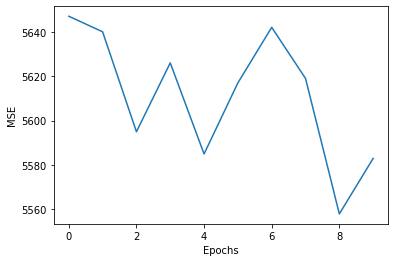

In [65]:
plt.plot(np.arange(0, len(mse_errors)), mse_errors)
plt.xlabel("Epochs")
plt.ylabel('MSE')
plt.show()

In [66]:
accuracy, y_pred1 = validation(X_test, y_test, W_final, b_final)
cm1 = confusion_matrix(y_test, y_pred1)
print(accuracy)
print(cm1)

0.768076807680768
[[6990  797]
 [1522  690]]


##Using Gradient Descent.
####**Loss function implemented is binary cross entropy, aka Log Loss*
####This is the actual loss function used in the implementation of Logistic Regresson function written in sklearn library.

In [67]:
def forward_prop(X, y, W, b):
    num_data = X.shape[1]
    z = sigmoid(np.dot(W.T, X.T) + b)
    #The defined cost function is for binary cross entropy.
    cost = np.squeeze((np.sum((np.array(y))*np.log(z)-(1-np.array(y))*np.log(1-z))))

    dw = (1/num_data)*np.dot(X.T, (z-np.array(y)).T)
    db = (1/num_data)*(np.sum(z-np.array(y)))
    return cost, dw, db

In [68]:
def train_SGD(X_train, y_train, num_iter, lr=0.00025):
    W, b, num_data, num_cols = initialize_zeros(X_train)
    
    costs = []

    for i in range(num_iter):
        for j in range(X_train.shape[0]):
            cost, dw, db = forward_prop(X_train[j].reshape(1, X_train.shape[1]), y_train.values[j], W, b)
            W = W - lr*dw
            b = b - lr*db

        if i%10==9:
            costs.append(cost)
            print("Cost at the end of iteration " + str(i+1) + ": " + str(cost))
        if i==num_iter-1:
            #With weights being close to 1e0, and learning rate being 2.5e-4, setting db threshold to 5e-2
            #lr*dw will cause a change of around 1e-5 i.e. 0.001% which is a decent enough delta in final stages of algorithm.
            if db>0.05:
                print("Didn't converge. Increase lr, num_iter")
    return W, b, costs


In [69]:
W_final, b_final, costs = train_SGD(X_train, y_train, 200)

acc, y_pred2 = validation(X_test, y_test, W_final, b_final)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
print(acc)

Cost at the end of iteration 10: 0.5526121871792264
Cost at the end of iteration 20: 0.3621461921926421
Cost at the end of iteration 30: 0.27521705375831945
Cost at the end of iteration 40: 0.22705783399023338
Cost at the end of iteration 50: 0.19802164835814579
Cost at the end of iteration 60: 0.1794955369620431
Cost at the end of iteration 70: 0.16715468598159014
Cost at the end of iteration 80: 0.1586511166134959
Cost at the end of iteration 90: 0.1526311426165767
Cost at the end of iteration 100: 0.14827494953458878
Cost at the end of iteration 110: 0.14506547656883104
Cost at the end of iteration 120: 0.1426654714624425
Cost at the end of iteration 130: 0.14084870670705324
Cost at the end of iteration 140: 0.13945978085928015
Cost at the end of iteration 150: 0.13838972988594525
Cost at the end of iteration 160: 0.13756075182923325
Cost at the end of iteration 170: 0.13691637777077206
Cost at the end of iteration 180: 0.13641500084229105
Cost at the end of iteration 190: 0.1360255

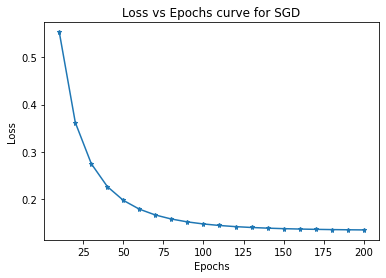

In [70]:
plt.plot(np.arange(0, len(costs))*10+10, costs, ms = 5, marker='*')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs curve for SGD')
plt.show()

As we can see, our basic ULR model gave an pretty nice accuracy. Not bad at all for starters but the time taken is very long.

#**Part 2: Naive Bayes Rule**

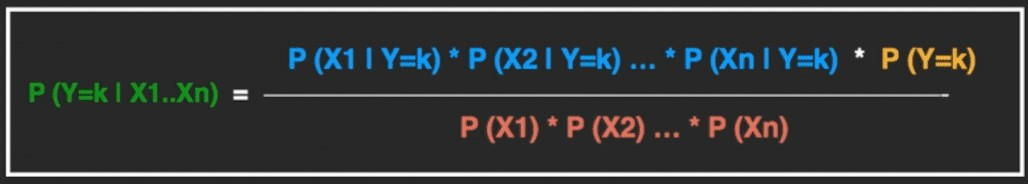

For a given row in x_test, find probabilities of y being 0 or 1 using above formula.
So what needs to be done is as follows:

*   For an assumed y, find the probability of all the X values in X_test from X_train by sampling whole columns.
*   Take product of these and multiply it with the probability of the assumed y value occuring
*   We do not need to divide the above product with the individual probabilities of X as it is going to be common in all cases.

Because the data is continuous data, we will be using the Gaussian Distribution to calculate probabilities



In [ ]:
X = df[df.columns[1:-1].values]
y = df[df.columns[-1]]
#stratify used as thsi will guarantee correct priors of y values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)

In [ ]:
#Calculate probability of different Y's
'''
Returns a dictionary with keys as unique y values and corresponding values as 
the prior probability of that y
'''
def prior_y(y_train):
    y_dic = {}
    var = np.unique(y_train, return_counts=True)
    for y in range(len(var[0])):
        y_dic[var[0][y]] = var[1][y]/len(y_train)
    return y_dic

In [ ]:
#Get separate dataframes for each y value and return a dictionary.
'''
Returns a dictionary with keys as unique y values and corresponding dataframes 
such that those dfs contain only those entries which predict the key
'''
def get_separate_df(X_train, y_train):
    y_dfs = {}
    var = np.unique(y_train)
    for y in var:
        inc_index = np.where(y_train==y)[0]
        y_dfs[y] = (X_train.iloc[inc_index])
    return y_dfs

In [ ]:
#This function will get us the mean and std dev of X variables
'''
Returns two dictionaries containing means and standard deviations of 
corresponding X values per column. Keys are unique y values.
'''
def get_dist(X_train, y_train):
    y_dfs = get_separate_df(X_train, y_train)
    y_mean = {}
    y_std = {}
    for y in y_dfs.keys():
        y_mean[y] = np.mean(y_dfs[y])
        y_std[y] = np.std(y_dfs[y])
    return y_mean, y_std

In [ ]:
#Calculate probabilities whenever needed using this function
'''
Used to calculate the probability of a random variable given the mean and 
dsatndard deviation
'''
def calc_probab(mean, dev, x):
    pow = np.exp(-1*((x-mean)**2)/(2*dev*dev))
    probab = pow/(np.sqrt(2*np.pi*dev*dev))
    return probab

####We are done with all the helper functions. Now for the actual implementation

In [ ]:
def predict_with_Bayes(X_train, y_train, X_test, y_test):
    priors_dic = prior_y(y_train)
    y_mean, y_std = get_dist(X_train, y_train)
    y_pred = []
    #iterate thru each example
    for i in range(len(y_test)):
        y_temp = []
        for y in priors_dic.keys():
            prob = np.prod(calc_probab(y_mean[y], y_std[y], X_test.iloc[i].values).values)*priors_dic[y]
            y_temp.append(prob)
        max_y = np.argmax(y_temp)
        keys = list(priors_dic)
        y_pred.append(keys[max_y])
    return y_pred

In [ ]:
y_predNB = predict_with_Bayes(X_train, y_train, X_test, y_test)

cmNB = confusion_matrix(y_test, y_predNB)
print(accuracy_score(y_test, y_predNB))
print(cmNB)